In [ ]:

import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/data/train_processed.csv')


In [ ]:
df_train.head()

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px rounded px font,piece code window gf x round font size way net...
1,7991,0,1.559923,1.478202,1.346843,land oop plugins mozilla central p reffed,need land oop plugins mozilla central p reffed...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash trying auto proxy para...,bug imported bugs plat netscape internal bug s...
3,6143,0,1.747366,1.622716,1.346843,crash setting display none grid row ns grid ge...,user agent mozilla window u window nt en us rv...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram im using mb memory cache bc change bug ...


In [ ]:

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

df_train['Processed_Title'] = df_train['Processed_Title'].astype(str).apply(lemmatize_text)
df_train['Processed_Description'] = df_train['Processed_Description'].astype(str).apply(lemmatize_text)

df_train.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px rounded px font,piece code window gf x round font size way net...
1,7991,0,1.559923,1.478202,1.346843,land oop plugins mozilla central p reffed,need land oop plugins mozilla central p reffed...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash trying auto proxy para...,bug imported bug plat netscape internal bug sy...
3,6143,0,1.747366,1.622716,1.346843,crash setting display none grid row n grid get...,user agent mozilla window u window nt en u rv ...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram im using mb memory cache bc change bug ...


In [ ]:
# prompt: Processed_Title	Processed_Description remove words unrelated to bug priority

import pandas as pd

# Assuming df_train is already loaded and processed as in the previous code

def remove_unrelated_words(text):
    # Define a list of words unrelated to bug priority
    unrelated_words = ["the", "a", "an", "is", "are", "was", "were", "be", "been", "being",
                       "to", "of", "in", "on", "at", "for", "with", "by", "from", "about",
                       # Add more words as needed
                      ]
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in unrelated_words]
    return " ".join(filtered_tokens)


df_train['Processed_Title'] = df_train['Processed_Title'].astype(str).apply(remove_unrelated_words)
df_train['Processed_Description'] = df_train['Processed_Description'].astype(str).apply(remove_unrelated_words)

df_train.head()

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px rounded px font,piece code window gf x round font size way net...
1,7991,0,1.559923,1.478202,1.346843,land oop plugins mozilla central p reffed,need land oop plugins mozilla central p reffed...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash trying auto proxy para...,bug imported bug plat netscape internal bug sy...
3,6143,0,1.747366,1.622716,1.346843,crash setting display none grid row n grid get...,user agent mozilla window u window nt en u rv ...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram im using mb memory cache bc change bug ...


In [ ]:


def remove_single_letters(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if len(token) > 1]
    return " ".join(filtered_tokens)

df_train['Processed_Title'] = df_train['Processed_Title'].astype(str).apply(remove_single_letters)
df_train['Processed_Description'] = df_train['Processed_Description'].astype(str).apply(remove_single_letters)

df_train.head()

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px rounded px font,piece code window gf round font size way netsc...
1,7991,0,1.559923,1.478202,1.346843,land oop plugins mozilla central reffed,need land oop plugins mozilla central reffed d...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash trying auto proxy para...,bug imported bug plat netscape internal bug sy...
3,6143,0,1.747366,1.622716,1.346843,crash setting display none grid row grid get p...,user agent mozilla window window nt en rv geck...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram im using mb memory cache bc change bug ...


In [ ]:
import spacy
from tqdm import tqdm

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def spacy_preprocess(text):
    # Process the text using spaCy
    doc = nlp(text)
    # Remove stopwords and punctuations, and keep only lemma of tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    # Join tokens back into a single string
    return " ".join(tokens)

# Use tqdm's progress_apply to show progress
tqdm.pandas()

# Apply the function to the DataFrame columns with progress bar
df_train['Processed_Title'] = df_train['Processed_Title'].astype(str).progress_apply(spacy_preprocess)
df_train['Processed_Description'] = df_train['Processed_Description'].astype(str).progress_apply(spacy_preprocess)

# Display the processed data
df_train.head()


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
100%|██████████| 52994/52994 [13:17<00:00, 66.42it/s]


,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px round px font,piece code window gf round font size way netsc...
1,7991,0,1.559923,1.478202,1.346843,land oop plugin mozilla central reffe,need land oop plugin mozilla central reffe def...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash try auto proxy paramet...,bug import bug plat netscape internal bug syst...
3,6143,0,1.747366,1.622716,1.346843,crash setting display grid row grid pref row h...,user agent mozilla window window not en rv gec...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram m mb memory cache bc change bug long ti...


In [ ]:

df_train.to_csv('veryclean_train.csv', index=False) #index=False prevents writing row indices to the file


In [ ]:
import pandas as pd

# Load the CSV file
df_train = pd.read_csv('/content/veryclean_train.csv')

# Display the first few rows of the dataframe to confirm it loaded correctly
df_train.head()


,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px round px font,piece code window gf round font size way netsc...
1,7991,0,1.559923,1.478202,1.346843,land oop plugin mozilla central reffe,need land oop plugin mozilla central reffe def...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash try auto proxy paramet...,bug import bug plat netscape internal bug syst...
3,6143,0,1.747366,1.622716,1.346843,crash setting display grid row grid pref row h...,user agent mozilla window window not en rv gec...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram m mb memory cache bc change bug long ti...


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm import tqdm

# Check if GPU is available and set the device
device = 0 if torch.cuda.is_available() else -1

# Load tokenizer and model directly
tokenizer = AutoTokenizer.from_pretrained("ietz/bert-base-uncased-finetuned-jira-inteldaos-issue-titles-and-bodies")
model = AutoModelForSequenceClassification.from_pretrained("ietz/bert-base-uncased-finetuned-jira-inteldaos-issue-titles-and-bodies")

# Set up a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)

# Ensure that 'Processed_Title' and 'Processed_Description' are below the max length
def truncate_input(text):
    if isinstance(text, str):  # Check if the text is a valid string
        return text[:512]  # Truncate to max length of 512 tokens
    else:
        return ""  # Return empty string for invalid types (NaN, float, etc.)

# Apply truncation function to avoid invalid inputs
df_train['Processed_Title'] = df_train['Processed_Title'].apply(truncate_input)
df_train['Processed_Description'] = df_train['Processed_Description'].apply(truncate_input)

# Apply the pipeline to both columns and store results in new columns for sentiment scores
tqdm.pandas()  # Enable progress_apply for pandas

# Use the pipeline to classify sentiment for title and description and extract score
df_train['Sentiment_Score_Title'] = df_train['Processed_Title'].progress_apply(lambda x: sentiment_pipeline(x)[0]['score'])
df_train['Sentiment_Score_Description'] = df_train['Processed_Description'].progress_apply(lambda x: sentiment_pipeline(x)[0]['score'])

# Drop 'Processed_Title' and 'Processed_Description' columns
df_train = df_train.drop(columns=['Processed_Title', 'Processed_Description'])

# Ensure that the necessary columns are still present and reorder them
df_train = df_train[['Issue_id', 'Priority', 'Component_Encoded', 'Status_Encoded', 'Resolution_Encoded', 'Sentiment_Score_Title', 'Sentiment_Score_Description']]

# Display the resulting DataFrame to confirm
df_train.head()



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ietz/bert-base-uncased-finetuned-jira-inteldaos-issue-titles-and-bodies and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 52994/52994 [08:05<00:00, 109.22it/s]


,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Sentiment_Score_Title,Sentiment_Score_Description
0,1700,0,1.632403,1.622716,1.346843,0.526881,0.527947
1,7991,0,1.559923,1.478202,1.346843,0.520273,0.539840
2,1150,0,1.646622,1.622716,1.346843,0.512245,0.533181
3,6143,0,1.747366,1.622716,1.346843,0.512419,0.561956
4,5952,0,1.614512,1.622716,1.346843,0.503981,0.535920


In [ ]:

unique_combinations_count = df_train[['Sentiment_Score_Title', 'Sentiment_Score_Description']].drop_duplicates().shape[0]

print(f"Number of unique combinations of Sentiment_Score_Title and Sentiment_Score_Description: {unique_combinations_count}")

Number of unique combinations of Sentiment_Score_Title and Sentiment_Score_Description: 52712


In [ ]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df_train is your DataFrame with 'Priority' as the target variable
# and other relevant features like 'Sentiment_Score_Title', 'Sentiment_Score_Description'

# Define features (X) and target (y)
X = df_train[['Sentiment_Score_Title', 'Sentiment_Score_Description', 'Component_Encoded', 'Status_Encoded', 'Resolution_Encoded']]
y = df_train['Priority']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6321351070855741


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier


# Preprocess the data (handle missing values)
df_train.fillna(df_train.mean(), inplace=True)

# Use sentiment scores from title and description as features
# Assuming you already have columns `Sentiment_Score_Title` and `Sentiment_Score_Description`
X = df_train[['Sentiment_Score_Title', 'Sentiment_Score_Description']]

# The target variable: 'Priority' (severity of the bug report)
y = df_train['Priority']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)


Accuracy: 0.5903
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1833
           1       0.00      0.00      0.00      1834
           2       0.59      1.00      0.74      6257
           3       0.00      0.00      0.00       436
           4       0.00      0.00      0.00       239

    accuracy                           0.59     10599
   macro avg       0.12      0.20      0.15     10599
weighted avg       0.35      0.59      0.44     10599



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


# Preprocess the data (handle missing values)
df_train.fillna(df_train.mean(), inplace=True)

# Features (X) and Target (y)
X = df_train.drop(columns=['Priority', 'Issue_id'])  # Drop the target and non-relevant columns
y = df_train['Priority']  # Target variable

# Standardize the data (important for AdaBoost and XGBoost)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the base learners (XGBoost and AdaBoost)
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Use 'multi:softmax' for multi-class problems
    eval_metric='mlogloss',
    tree_method='gpu_hist',  # If you want to use GPU for XGBoost
    gpu_id=0,
    predictor='gpu_predictor'
)

adaboost_model = AdaBoostClassifier(n_estimators=50)

# Initialize VotingClassifier to combine AdaBoost and XGBoost
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('adaboost', adaboost_model)],
    voting='soft'  # Soft voting takes the predicted probabilities into account
)

# Train the ensemble model
voting_model.fit(X_train, y_train)

# Make predictions
y_pred = voting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:37:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:37:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6310
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.29      0.37      1833
           1       0.37      0.16      0.22      1834
           2       0.68      0.93      0.78      6257
           3       0.45      0.07      0.12       436
           4       0.42      0.13      0.19       239

    accuracy                           0.63     10599
   macro avg       0.48      0.31      0.34     10599
weighted avg       0.58      0.63      0.57     10599



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:37:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [ ]:

import pandas as pd

df_test = pd.read_csv('/content/test_processed.csv')

df_test.head()

,Issue_id,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,6578,0.973339,1.622716,1.346843,finalize yield syntax match es js proposal,track python currently allow function f yield ...
1,8050,1.614512,1.478202,1.346843,e http offline application cache,actually know little application caching offli...
2,5281,1.666447,1.478202,1.346843,fix add get owner document ns i content ns gen...,see comment bug idea add already add ref e dns...
3,7871,1.355932,1.622716,1.346843,text editing broken firebug edit mode extension,getting report editing broken firebug html sty...
4,2411,1.559923,1.622716,1.821067,shockwave movie redraw improperly mac ns beta ...,bugzilla helper user agent mozilla macintosh u...


In [ ]:
!pip install vaderSentiment tqdm pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment with progress bar
def get_sentiment_with_progress(column_data):
    sentiment_scores = []
    for text in tqdm(column_data, desc="Processing Sentiment"):
        # Convert non-string values (like floats) to empty strings
        if not isinstance(text, str):
            text = ''  # Replace NaN or non-string values with an empty string
        sentiment_scores.append(analyzer.polarity_scores(text)['compound'])
    return sentiment_scores

# Ensure the columns 'Processed_Title' and 'Processed_Description' exist in df_train and are strings
df_train['Processed_Title'] = df_train['Processed_Title'].fillna('').astype(str)
df_train['Processed_Description'] = df_train['Processed_Description'].fillna('').astype(str)

# Apply sentiment analysis to both title and description with progress tracking
df_train['Title_Sentiment'] = get_sentiment_with_progress(df_train['Processed_Title'])
df_train['Description_Sentiment'] = get_sentiment_with_progress(df_train['Processed_Description'])

# Drop 'Processed_Title' and 'Processed_Description' columns
df_train = df_train.drop(columns=['Processed_Title', 'Processed_Description'])

# Save or display the resulting DataFrame
# Example: df_train.to_csv('output_file.csv', index=False)  # Save to file
print(df_train)  # Display the DataFrame


Processing Sentiment: 100%|██████████| 52994/52994 [02:02<00:00, 432.57it/s]

       Issue_id  Priority  Component_Encoded  Status_Encoded  \
0          1700         0           1.632403        1.622716   
1          7991         0           1.559923        1.478202   
2          1150         0           1.646622        1.622716   
3          6143         0           1.747366        1.622716   
4          5952         0           1.614512        1.622716   
...         ...       ...                ...             ...   
52989     53192         4           3.067164        1.478202   
52990     53717         4           1.607901        1.478202   
52991     53242         4           1.868421        1.478202   
52992     53682         4           1.666447        1.622716   
52993     53348         4           3.155738        1.478202   

       Resolution_Encoded  Title_Sentiment  Description_Sentiment  
0                1.346843           0.0000                -0.4019  
1                1.346843           0.0000                 0.2732  
2                1.346843  

In [ ]:
df_train.head()

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Title_Sentiment,Description_Sentiment
0,1700,0,1.632403,1.622716,1.346843,0.0000,-0.4019
1,7991,0,1.559923,1.478202,1.346843,0.0000,0.2732
2,1150,0,1.646622,1.622716,1.346843,-0.0258,-0.6705
3,6143,0,1.747366,1.622716,1.346843,-0.4019,0.3818
4,5952,0,1.614512,1.622716,1.346843,0.3400,0.7834


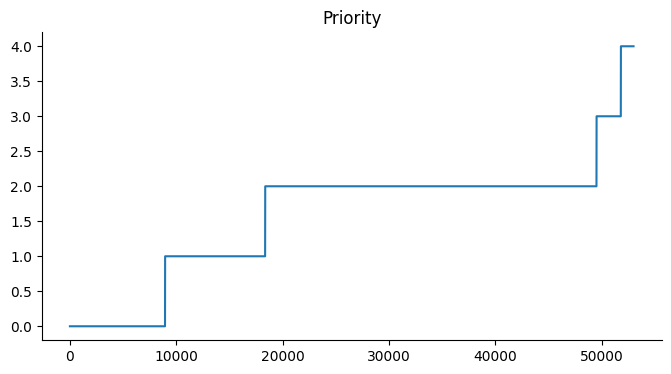

In [ ]:
# @title Priority

from matplotlib import pyplot as plt
df_train['Priority'].plot(kind='line', figsize=(8, 4), title='Priority')
plt.gca().spines[['top', 'right']].set_visible(False)

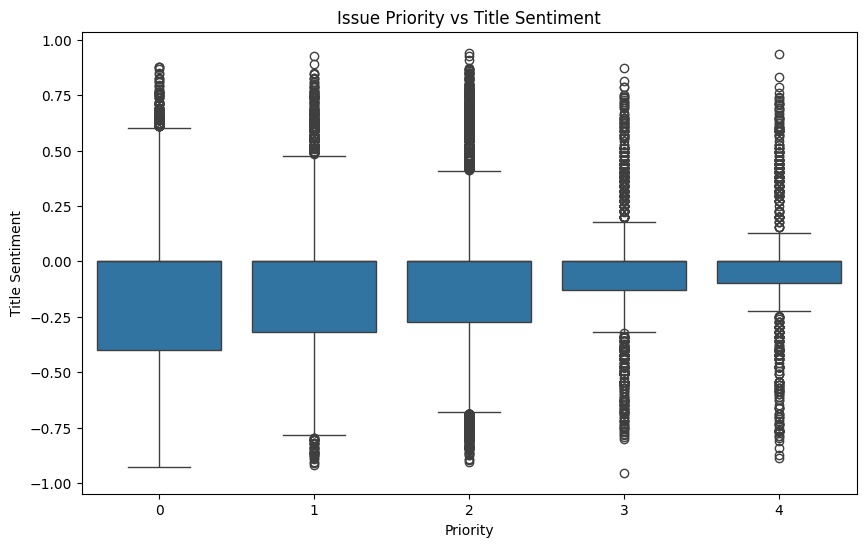

In [ ]:
# @title Issue Priority vs Title Sentiment

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Priority', y='Title_Sentiment', data=df_train)
plt.title('Issue Priority vs Title Sentiment')
plt.xlabel('Priority')
_ = plt.ylabel('Title Sentiment')

In [ ]:
# prompt: for train_df give code to train model for predicting priority, utilize all features

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import classification_report

# Assuming df_train is already processed as in the previous code

# Prepare the data
X = df_train.drop(columns=['Priority'])  # Features
y = df_train['Priority']  # Target variable

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['Component', 'Status', 'Assignee', 'Created_Day_Of_Week', 'Created_Month'])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split

# Initialize and train the model (example using RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming train_df is already loaded as shown in your image
# Split the data into features and target
X = df_train.drop(columns=['Issue_id', 'Priority'])
y = df_train['Priority']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to train and evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Cross-validation for more robust performance assessment
    scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print performance metrics
    print(f'\nModel: {model_name}')
    print(f'Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
    print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
Cross-Validation Accuracy: 0.62 (+/- 0.00)
Test Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.30      0.37      1833
           1       0.28      0.03      0.05      1834
           2       0.65      0.96      0.77      6257
           3       0.00      0.00      0.00       436
           4       0.33      0.00      0.01       239

    accuracy                           0.62     10599
   macro avg       0.35      0.26      0.24     10599
weighted avg       0.52      0.62      0.53     10599



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Random Forest
Cross-Validation Accuracy: 0.58 (+/- 0.01)
Test Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.32      0.35      1833
           1       0.27      0.20      0.23      1834
           2       0.69      0.81      0.74      6257
           3       0.16      0.09      0.12       436
           4       0.24      0.15      0.19       239

    accuracy                           0.57     10599
   macro avg       0.35      0.32      0.33     10599
weighted avg       0.53      0.57      0.55     10599


Model: Support Vector Classifier
Cross-Validation Accuracy: 0.62 (+/- 0.00)
Test Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.26      0.35      1833
           1       0.00      0.00      0.00      1834
           2       0.63      0.97      0.77      6257
           3       0.33      0.02      0.03       436
           4

In [ ]:

df_train.to_csv('train_senti.csv', index=False)

In [ ]:
# prompt: load train_senti as df_train

import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/data/train_processed.csv')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm  # Import tqdm for progress bars

# Load your dataset (assuming df_train is already loaded)
# Ensure 'Priority' is a numeric target variable for regression
# If 'Priority' is categorical, consider using classification instead.

# Split the data into features and target
X = df_train.drop(columns=['Issue_id', 'Priority'])  # Features
y = df_train['Priority']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train and evaluate the Decision Tree Regressor with a progress bar
with tqdm(total=1, desc="Training Decision Tree Regressor", unit="model") as pbar:
    # Cross-validation for more robust performance assessment
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pbar.update(1)  # Update the progress bar

# Print performance metrics
print(f'\nModel: Decision Tree Regressor')
print(f'Cross-Validation Mean Squared Error: {-scores.mean():.2f} (+/- {scores.std():.2f})')
print(f'Test Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')

Training Decision Tree Regressor: 100%|██████████| 1/1 [00:03<00:00,  3.30s/model]


Model: Decision Tree Regressor
Cross-Validation Mean Squared Error: 1.18 (+/- 0.01)
Test Mean Squared Error: 1.21
R^2 Score: -0.50


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tqdm import tqdm  # Import tqdm for progress bars

# Load your dataset (assuming df_train is already loaded)
# Ensure 'Priority' is a numeric target variable for regression

# Split the data into features and target
X = df_train.drop(columns=['Issue_id', 'Priority'])  # Features
y = df_train['Priority']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train and evaluate the Decision Tree Regressor with a progress bar
with tqdm(total=1, desc="Training Decision Tree Regressor", unit="model") as pbar:
    # Cross-validation for more robust performance assessment
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pbar.update(1)  # Update the progress bar

# Print performance metrics
print(f'\nModel: Decision Tree Regressor')
print(f'Cross-Validation Mean Squared Error: {-scores.mean():.2f} (+/- {scores.std():.2f})')
print(f'Test Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')

# Calculate R^2 Score as a percentage
r2_percentage = r2_score(y_test, y_pred) * 100
print(f'R^2 Score (as percentage): {r2_percentage:.2f}%')

Training Decision Tree Regressor: 100%|██████████| 1/1 [00:02<00:00,  2.83s/model]


Model: Decision Tree Regressor
Cross-Validation Mean Squared Error: 1.18 (+/- 0.01)
Test Mean Squared Error: 1.21
R^2 Score: -0.50
Mean Absolute Error: 0.72
R^2 Score (as percentage): -49.96%


In [ ]:


df_test = pd.read_csv('/content/test_processed.csv')

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment with progress bar
def get_sentiment_with_progress(column_data):
    sentiment_scores = []
    for text in tqdm(column_data, desc="Processing Sentiment"):
        # Convert non-string values (like floats) to empty strings
        if not isinstance(text, str):
            text = ''  # Replace NaN or non-string values with an empty string
        sentiment_scores.append(analyzer.polarity_scores(text)['compound'])
    return sentiment_scores

# Ensure the columns 'Processed_Title' and 'Processed_Description' exist in df_test and are strings
df_test['Processed_Title'] = df_test['Processed_Title'].fillna('').astype(str)
df_test['Processed_Description'] = df_test['Processed_Description'].fillna('').astype(str)

# Apply sentiment analysis to both title and description with progress tracking
df_test['Title_Sentiment'] = get_sentiment_with_progress(df_test['Processed_Title'])
df_test['Description_Sentiment'] = get_sentiment_with_progress(df_test['Processed_Description'])

# Drop 'Processed_Title' and 'Processed_Description' columns
df_test = df_test.drop(columns=['Processed_Title', 'Processed_Description'])

# Save or display the resulting DataFrame
# Example: df_test.to_csv('output_file.csv', index=False)  # Save to file
print(df_test)  # Display the DataFrame


Processing Sentiment: 100%|██████████| 1328/1328 [00:03<00:00, 332.79it/s]

      Issue_id  Component_Encoded  Status_Encoded  Resolution_Encoded  \
0         6578           0.973339        1.622716            1.346843   
1         8050           1.614512        1.478202            1.346843   
2         5281           1.666447        1.478202            1.346843   
3         7871           1.355932        1.622716            1.346843   
4         2411           1.559923        1.622716            1.821067   
...        ...                ...             ...                 ...   
1323     53466           1.650667        1.622716            1.821067   
1324     53480           1.721535        1.478202            1.898834   
1325     53208           3.067164        1.478202            2.028533   
1326     53552           1.137255        1.622716            1.821067   
1327     53728           1.632403        1.478202            1.777189   

      Title_Sentiment  Description_Sentiment  
0              0.0000                 0.2023  
1             -0.1280        

In [ ]:


df_test.to_csv('test_senti.csv', index=False)

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Load dataset
df_senti = pd.read_csv("/content/drive/MyDrive/data/train_processed.csv")

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Function to calculate sentiment with progress bar
def get_sentiment_with_progress(column_data):
    sentiment_scores = []
    for text in tqdm(column_data, desc="Processing Sentiment"):
        if not isinstance(text, str):
            text = ''  # Handle non-string values
        # Analyze sentiment
        result = sentiment_analyzer(text[:512])  # Truncate long texts if necessary
        label = result[0]['label']
        score = result[0]['score']

        # Convert labels to numeric scores
        if label == 'LABEL_2':  # Positive
            sentiment_scores.append(score)  # Positive score
        elif label == 'LABEL_1':  # Neutral
            sentiment_scores.append(0)  # Neutral as 0
        else:  # Negative
            sentiment_scores.append(-score)  # Negative as negative score

    return sentiment_scores

# Prepare columns
df_senti['Processed_Title'] = df_senti['Processed_Title'].fillna('').astype(str)
df_senti['Processed_Description'] = df_senti['Processed_Description'].fillna('').astype(str)

# Apply sentiment analysis with progress tracking
df_senti['Title_Sentiment'] = get_sentiment_with_progress(df_senti['Processed_Title'])
df_senti['Description_Sentiment'] = get_sentiment_with_progress(df_senti['Processed_Description'])

# Drop unneeded columns
df_senti = df_senti.drop(columns=['Processed_Title', 'Processed_Description'])

# Display resulting DataFrame
print(df_senti)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Processing Sentiment: 100%|██████████| 52994/52994 [51:55<00:00, 17.01it/s]


       Issue_id  Priority  Component_Encoded  Status_Encoded  \
0          1700         0           1.632403        1.622716   
1          7991         0           1.559923        1.478202   
2          1150         0           1.646622        1.622716   
3          6143         0           1.747366        1.622716   
4          5952         0           1.614512        1.622716   
...         ...       ...                ...             ...   
52989     53192         4           3.067164        1.478202   
52990     53717         4           1.607901        1.478202   
52991     53242         4           1.868421        1.478202   
52992     53682         4           1.666447        1.622716   
52993     53348         4           3.155738        1.478202   

       Resolution_Encoded  Title_Sentiment  Description_Sentiment  
0                1.346843         0.000000               0.000000  
1                1.346843         0.000000               0.000000  
2                1.346843  

In [ ]:
df_senti.head(790)

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Title_Sentiment,Description_Sentiment
0,1700,0,1.632403,1.622716,1.346843,0.000000,0.000000
1,7991,0,1.559923,1.478202,1.346843,0.000000,0.000000
2,1150,0,1.646622,1.622716,1.346843,-0.761471,-0.515999
3,6143,0,1.747366,1.622716,1.346843,0.000000,0.000000
4,5952,0,1.614512,1.622716,1.346843,0.000000,0.000000
...,...,...,...,...,...,...,...
785,8678,0,0.353846,1.478202,1.346843,0.000000,-0.598572
786,2612,0,1.607901,1.622716,2.028533,0.000000,0.000000
787,4509,0,1.425697,1.478202,1.346843,0.000000,0.000000
788,5222,0,1.721535,1.478202,1.346843,-0.582666,0.000000


In [ ]:
# prompt: save df_senti as bert_training.csv

df_senti.to_csv('bert_training.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# prompt: copy /content/train_processed.csv to /content/drive/MyDrive/data

!cp /content/train_processed.csv /content/drive/MyDrive/data


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
!apt-get install -y opencl-headers ocl-icd-opencl-dev
!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/include/OpenCL" --install-option="--opencl-library=/usr/lib/x86_64-linux-gnu/libOpenCL.so"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ocl-icd-opencl-dev is already the newest version (2.2.14-3).
ocl-icd-opencl-dev set to manually installed.
The following NEW packages will be installed:
  opencl-headers
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,754 B of archives.
After this operation, 12.3 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 opencl-headers all 3.0~2022.01.04-1 [1,754 B]
Fetched 1,754 B in 0s (5,869 B/s)
Selecting previously unselected package opencl-headers.
(Reading database ... 123599 files and directories currently installed.)
Preparing to unpack .../opencl-headers_3.0~2022.01.04-1_all.deb ...
Unpacking opencl-headers (3.0~2022.01.04-1) ...
Setting up opencl-headers (3.0~2022.01.04-1) ...

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements fil

In [ ]:
import pandas as pd
import cupy  # Ensure CuPy is installed for GPU support
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import ADASYN
import lightgbm as lgb
import optuna
from sklearn.metrics import accuracy_score, classification_report
import joblib
from sklearn.ensemble import VotingClassifier

# Check if GPU is available
print("Using GPU" if cupy.cuda.runtime.getDeviceCount() > 0 else "Using CPU")

# Load the dataset (update the path as needed)
df_train = pd.read_csv('/content/bert_training.csv')

# Split the data into features and target
X = df_train.drop(columns=['Issue_id', 'Priority'])
y = df_train['Priority']

# Handle class imbalance using ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Feature Engineering: Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_resampled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Function to optimize LightGBM hyperparameters
def optimize_lgb(trial):
    param = {
        'objective': 'multiclass',
        'num_classes': len(y.unique()),
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'random_state': 42,
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', -1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'device': 'gpu' if cupy.cuda.runtime.getDeviceCount() > 0 else 'cpu',  # Use GPU if available
    }

    # Create LightGBM dataset
    dtrain = lgb.Dataset(X_train, label=y_train)

    # Train the model
    model = lgb.train(param, dtrain, num_boost_round=100)

    # Cross-validation
    scores = lgb.cv(param, dtrain, num_boost_round=100, nfold=5, metrics='multi_logloss', seed=42)
    return min(scores['multi_logloss-mean'])

# Optimize LightGBM hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(optimize_lgb, n_trials=50)

# Get the best parameters
best_lgb_params = study.best_params
print(f'Best parameters for LightGBM: {best_lgb_params}')

# Initialize models dictionary
models = {
    'LightGBM': lgb.LGBMClassifier(**best_lgb_params)
}

# Train models
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Save the model
    joblib.dump(model, f'{model_name}_model.pkl')

    # Print performance metrics
    print(f'\nModel: {model_name}')
    print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# Ensemble method: Voting Classifier
voting_clf = VotingClassifier(estimators=[(model_name, model) for model_name, model in models.items()], voting='hard')

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_voting = voting

Using GPU


[I 2024-11-03 20:03:35,798] A new study created in memory with name: no-name-0f370c4a-e478-4ff5-bc6d-82c95e3aad76
<ipython-input-15-b7ff21024a4a>:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
<ipython-input-15-b7ff21024a4a>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
<ipython-input-15-b7ff21024a4a>:47: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('featur

LightGBMError: No OpenCL device found

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Load dataset
df_senti = pd.read_csv("/content/test_processed.csv")

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Function to calculate sentiment with progress bar
def get_sentiment_with_progress(column_data):
    sentiment_scores = []
    for text in tqdm(column_data, desc="Processing Sentiment"):
        if not isinstance(text, str):
            text = ''  # Handle non-string values
        # Analyze sentiment
        result = sentiment_analyzer(text[:512])  # Truncate long texts if necessary
        label = result[0]['label']
        score = result[0]['score']

        # Convert labels to numeric scores
        if label == 'LABEL_2':  # Positive
            sentiment_scores.append(score)  # Positive score
        elif label == 'LABEL_1':  # Neutral
            sentiment_scores.append(0)  # Neutral as 0
        else:  # Negative
            sentiment_scores.append(-score)  # Negative as negative score

    return sentiment_scores

# Prepare columns
df_senti['Processed_Title'] = df_senti['Processed_Title'].fillna('').astype(str)
df_senti['Processed_Description'] = df_senti['Processed_Description'].fillna('').astype(str)

# Apply sentiment analysis with progress tracking
df_senti['Title_Sentiment'] = get_sentiment_with_progress(df_senti['Processed_Title'])
df_senti['Description_Sentiment'] = get_sentiment_with_progress(df_senti['Processed_Description'])

# Drop unneeded columns
df_senti = df_senti.drop(columns=['Processed_Title', 'Processed_Description'])

# Display resulting DataFrame
print(df_senti)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Processing Sentiment: 100%|██████████| 1328/1328 [01:16<00:00, 17.26it/s]

      Issue_id  Component_Encoded  Status_Encoded  Resolution_Encoded  \
0         6578           0.973339        1.622716            1.346843   
1         8050           1.614512        1.478202            1.346843   
2         5281           1.666447        1.478202            1.346843   
3         7871           1.355932        1.622716            1.346843   
4         2411           1.559923        1.622716            1.821067   
...        ...                ...             ...                 ...   
1323     53466           1.650667        1.622716            1.821067   
1324     53480           1.721535        1.478202            1.898834   
1325     53208           3.067164        1.478202            2.028533   
1326     53552           1.137255        1.622716            1.821067   
1327     53728           1.632403        1.478202            1.777189   

      Title_Sentiment  Description_Sentiment  
0            0.000000               0.000000  
1            0.000000        

In [ ]:


df_senti.to_csv('senti_test.csv', index=False)

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 10.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=0ec3d9f44eaad2facd56b615d6e647ff8c50bda511e1c7d5556af374bcc1cc6f
  Stored in directory: /root/.ca

In [ ]:


import pandas as pd

df_test = pd.read_csv('/content/test_processed.csv')

In [ ]:


import pandas as pd

df_train = pd.read_csv('/content/df_train_flair.csv')

In [ ]:
import pandas as pd
from flair.models import TextClassifier
from flair.data import Sentence
from tqdm import tqdm

# Load the sentiment analysis model from Flair
classifier = TextClassifier.load('en-sentiment')

# Function to calculate sentiment with progress bar using Flair
def get_sentiment_with_progress(column_data):
    sentiment_scores = []
    for text in tqdm(column_data, desc="Processing Sentiment"):
        # Convert non-string values (like floats) to empty strings
        if not isinstance(text, str):
            text = ''  # Replace NaN or non-string values with an empty string

        # Create a Sentence object for Flair
        sentence = Sentence(text)

        # Predict sentiment
        classifier.predict(sentence)

        # Check if there are any labels available
        if sentence.labels:
            # Get the sentiment score (positive or negative)
            score = sentence.labels[0].score  # Get the score of the predicted label
        else:
            score = None  # Assign None or a default value if no label is found

        sentiment_scores.append(score)

    return sentiment_scores

# Ensure the columns 'Processed_Title' and 'Processed_Description' exist in df_test and are strings
df_test['Processed_Title'] = df_test['Processed_Title'].fillna('').astype(str)
df_test['Processed_Description'] = df_test['Processed_Description'].fillna('').astype(str)

# Apply sentiment analysis to both title and description with progress tracking
df_test['Title_Sentiment'] = get_sentiment_with_progress(df_test['Processed_Title'])
df_test['Description_Sentiment'] = get_sentiment_with_progress(df_test['Processed_Description'])

# Drop 'Processed_Title' and 'Processed_Description' columns
df_test = df_test.drop(columns=['Processed_Title', 'Processed_Description'])

# Save or display the resulting DataFrame
# Example: df_test.to_csv('output_file.csv', index=False)  # Save to file
print(df_test)  # Display the DataFrame

Processing Sentiment:  99%|█████████▉| 1320/1328 [00:08<00:00, 162.62it/s]

2024-11-03 22:58:27,869 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:   5%|▍         | 66/1328 [00:00<00:11, 110.29it/s]

2024-11-03 22:58:28,594 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:   9%|▉         | 119/1328 [00:00<00:09, 128.18it/s]

2024-11-03 22:58:28,941 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2024-11-03 22:58:28,962 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  11%|█▏        | 151/1328 [00:01<00:08, 139.62it/s]

2024-11-03 22:58:29,175 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  14%|█▎        | 181/1328 [00:01<00:08, 134.48it/s]

2024-11-03 22:58:29,390 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  17%|█▋        | 224/1328 [00:01<00:08, 136.83it/s]

2024-11-03 22:58:29,716 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  28%|██▊       | 366/1328 [00:02<00:07, 136.42it/s]

2024-11-03 22:58:30,808 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  46%|████▌     | 611/1328 [00:04<00:05, 131.35it/s]

2024-11-03 22:58:32,698 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  64%|██████▍   | 850/1328 [00:06<00:03, 127.29it/s]

2024-11-03 22:58:34,476 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  72%|███████▏  | 955/1328 [00:07<00:02, 141.39it/s]

2024-11-03 22:58:35,220 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  75%|███████▌  | 1001/1328 [00:07<00:02, 145.06it/s]

2024-11-03 22:58:35,582 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  83%|████████▎ | 1102/1328 [00:08<00:01, 128.96it/s]

2024-11-03 22:58:36,322 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  90%|█████████ | 1201/1328 [00:09<00:00, 133.01it/s]

2024-11-03 22:58:37,157 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment:  97%|█████████▋| 1283/1328 [00:09<00:00, 122.10it/s]

2024-11-03 22:58:37,760 Warning: An empty Sentence was created! Are there empty strings in your dataset?


Processing Sentiment: 100%|██████████| 1328/1328 [00:10<00:00, 125.51it/s]

      Issue_id  Component_Encoded  Status_Encoded  Resolution_Encoded  \
0         6578           0.973339        1.622716            1.346843   
1         8050           1.614512        1.478202            1.346843   
2         5281           1.666447        1.478202            1.346843   
3         7871           1.355932        1.622716            1.346843   
4         2411           1.559923        1.622716            1.821067   
...        ...                ...             ...                 ...   
1323     53466           1.650667        1.622716            1.821067   
1324     53480           1.721535        1.478202            1.898834   
1325     53208           3.067164        1.478202            2.028533   
1326     53552           1.137255        1.622716            1.821067   
1327     53728           1.632403        1.478202            1.777189   

      Title_Sentiment  Description_Sentiment  
0            0.970154               0.966689  
1            0.689330        

In [ ]:

df_train.to_csv('df_train_flair.csv', index=False)
df_test.to_csv('df_test_flair.csv', index=False)

In [ ]:

import pandas as pd

df_train = pd.read_csv('/content/df_train_flair.csv')

In [ ]:

# Check for null values in each column
print(df_train.isnull().sum())

# Remove rows with any null values
df_train = df_train.dropna()


Issue_id                   0
Priority                   0
Component_Encoded          0
Status_Encoded             0
Resolution_Encoded         0
Title_Sentiment            2
Description_Sentiment    553
dtype: int64


In [ ]:
df_train.head()

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Title_Sentiment,Description_Sentiment
0,1700,0,1.632403,1.622716,1.346843,0.999523,0.627202
1,7991,0,1.559923,1.478202,1.346843,0.512738,0.816919
2,1150,0,1.646622,1.622716,1.346843,0.999801,0.999746
3,6143,0,1.747366,1.622716,1.346843,0.998432,0.990860
4,5952,0,1.614512,1.622716,1.346843,0.754276,0.999455


In [ ]:
print(df_train.isnull().sum())

Issue_id                 0
Priority                 0
Component_Encoded        0
Status_Encoded           0
Resolution_Encoded       0
Title_Sentiment          0
Description_Sentiment    0
dtype: int64


In [ ]:


df_train.to_csv('df_train_saved.csv', index=False)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.1 MB/s eta 0:00:00


In [ ]:
# prompt: xgboost training code

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your preprocessed data
df_train = pd.read_csv('/content/df_train_saved.csv')  # Replace with your actual file path

# Separate features (X) and target variable (y)
X = df_train.drop(columns=['Issue_id', 'Priority'])
y = df_train['Priority']


# Convert non-numeric columns to numeric using Label Encoding (if needed)
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
      X[col] = pd.factorize(X[col])[0]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Use appropriate objective function
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# ... (rest of your code for predictions on the test set)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import joblib  # For saving models
import xgboost as xgb
from catboost import CatBoostClassifier  # Import CatBoost

# Check if GPU is available
import cupy  # Ensure CuPy is installed for GPU support
print("Using GPU" if cupy.cuda.runtime.getDeviceCount() > 0 else "Using CPU")

# Load the dataset (update the path as needed)
df_train = pd.read_csv('/content/df_train_flair.csv')

# Split the data into features and target
X = df_train.drop(columns=['Issue_id', 'Priority'])
y = df_train['Priority']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X_imputed = imputer.fit_transform(X)

# Feature Engineering: Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBoost model with GPU settings
xgb_model = xgb.XGBClassifier(
    n_estimators=499,
    max_depth=10,
    learning_rate=0.12964155605327962,
    subsample=0.7596933626663662,
    colsample_bytree=0.9272553178806969,
    tree_method='gpu_hist',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    verbosity=0  # Suppress output during training
)

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=499,
    depth=10,
    learning_rate=0.1,
    random_seed=42,
    verbose=0,  # Suppress output during training
)

# Create a voting classifier with XGBoost and CatBoost
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('catboost', catboost_model)
], voting='soft')

# Train the Voting Classifier
print("\nTraining Voting Classifier...")
voting_clf.fit(X_train, y_train)

# Cross-validation for more robust performance assessment
scores = cross_val_score(voting_clf, X_train, y_train, cv=StratifiedKFold(n_splits=5))
y_pred = voting_clf.predict(X_test)

# Save the model using joblib
model_filename = 'Voting_Classifier_with_CatBoost.pkl'
joblib.dump(voting_clf, model_filename)
print(f'Model saved to {model_filename}')

# Print performance metrics
print(f'\nModel: Voting Classifier with XGBoost and CatBoost')
print(f'Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Demonstration of loading the model for future predictions (optional)
loaded_model = joblib.load(model_filename)
print("\nModel loaded successfully!")

# Example of making predictions with the loaded model (using X_test)
loaded_predictions = loaded_model.predict(X_test)
print(f'Loaded Model Test Accuracy: {accuracy_score(y_test, loaded_predictions):.2f}')

Using GPU

Training Voting Classifier...
Model saved to Voting_Classifier_with_CatBoost.pkl

Model: Voting Classifier with XGBoost and CatBoost
Cross-Validation Accuracy: 0.61 (+/- 0.00)
Test Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.30      0.36      1789
           1       0.33      0.19      0.24      1882
           2       0.69      0.89      0.78      6231
           3       0.32      0.06      0.11       457
           4       0.49      0.15      0.22       240

    accuracy                           0.62     10599
   macro avg       0.45      0.32      0.34     10599
weighted avg       0.56      0.62      0.57     10599


Model loaded successfully!
Loaded Model Test Accuracy: 0.62


In [ ]:


import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/data/train_processed.csv')
print(df_train.head())

   Issue_id  Priority  Component_Encoded  Status_Encoded  Resolution_Encoded  \
0      1700         0           1.632403        1.622716            1.346843   
1      7991         0           1.559923        1.478202            1.346843   
2      1150         0           1.646622        1.622716            1.346843   
3      6143         0           1.747366        1.622716            1.346843   
4      5952         0           1.614512        1.622716            1.346843   

                                     Processed_Title  \
0                       font size px rounded px font   
1          land oop plugins mozilla central p reffed   
2  xp com proxy code crash trying auto proxy para...   
3  crash setting display none grid row ns grid ge...   
4                limit memory cache reasonable value   

                               Processed_Description  
0  piece code window gf x round font size way net...  
1  need land oop plugins mozilla central p reffed...  
2  bug imported b

In [ ]:
df_train.head()

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px rounded px font,piece code window gf x round font size way net...
1,7991,0,1.559923,1.478202,1.346843,land oop plugins mozilla central p reffed,need land oop plugins mozilla central p reffed...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash trying auto proxy para...,bug imported bugs plat netscape internal bug s...
3,6143,0,1.747366,1.622716,1.346843,crash setting display none grid row ns grid ge...,user agent mozilla window u window nt en us rv...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram im using mb memory cache bc change bug ...


In [ ]:

import pandas as pd

def remove_single_letters(text):
  words = text.split()
  processed_words = [word for word in words if len(word) > 1]
  return " ".join(processed_words)


df_train['Processed_Title'] = df_train['Processed_Title'].astype(str).apply(remove_single_letters)
df_train['Processed_Description'] = df_train['Processed_Description'].astype(str).apply(remove_single_letters)

In [ ]:
df_train.head()

,Issue_id,Priority,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,1700,0,1.632403,1.622716,1.346843,font size px rounded px font,piece code window gf round font size way netsc...
1,7991,0,1.559923,1.478202,1.346843,land oop plugins mozilla central reffed,need land oop plugins mozilla central reffed d...
2,1150,0,1.646622,1.622716,1.346843,xp com proxy code crash trying auto proxy para...,bug imported bugs plat netscape internal bug s...
3,6143,0,1.747366,1.622716,1.346843,crash setting display none grid row ns grid ge...,user agent mozilla window window nt en us rv g...
4,5952,0,1.614512,1.622716,1.346843,limit memory cache reasonable value,gb ram im using mb memory cache bc change bug ...


In [ ]:

df_train = df_train.drop(columns=['Component_Encoded'])

In [ ]:


df_train = df_train.drop(columns=['Status_Encoded', 'Resolution_Encoded'])

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment with progress bar
def get_sentiment_with_progress(column_data):
    sentiment_scores = []
    for text in tqdm(column_data, desc="Processing Sentiment"):
        # Convert non-string values (like floats) to empty strings
        if not isinstance(text, str):
            text = ''  # Replace NaN or non-string values with an empty string
        sentiment_scores.append(analyzer.polarity_scores(text)['compound'])
    return sentiment_scores

# Ensure the columns 'Processed_Title' and 'Processed_Description' exist in df_train and are strings
df_train['Processed_Title'] = df_train['Processed_Title'].fillna('').astype(str)
df_train['Processed_Description'] = df_train['Processed_Description'].fillna('').astype(str)

# Apply sentiment analysis to both title and description with progress tracking
df_train['Title_Sentiment'] = get_sentiment_with_progress(df_train['Processed_Title'])
df_train['Description_Sentiment'] = get_sentiment_with_progress(df_train['Processed_Description'])

# Drop 'Processed_Title' and 'Processed_Description' columns
df_train = df_train.drop(columns=['Processed_Title', 'Processed_Description'])

print(df_train)  # Display the DataFrame

Processing Sentiment: 100%|██████████| 52994/52994 [01:20<00:00, 658.55it/s]

       Issue_id  Priority  Title_Sentiment  Description_Sentiment
0          1700         0           0.0000                -0.4019
1          7991         0           0.0000                 0.2732
2          1150         0          -0.0258                -0.6705
3          6143         0          -0.4019                 0.3818
4          5952         0           0.3400                 0.7834
...         ...       ...              ...                    ...
52989     53192         4           0.0000                -0.1761
52990     53717         4           0.4404                 0.7717
52991     53242         4           0.0000                 0.0000
52992     53682         4          -0.2584                 0.6597
52993     53348         4           0.0000                -0.3818

[52994 rows x 4 columns]


In [ ]:
df_train.head()

,Issue_id,Priority,Title_Sentiment,Description_Sentiment
0,1700,0,0.0000,-0.4019
1,7991,0,0.0000,0.2732
2,1150,0,-0.0258,-0.6705
3,6143,0,-0.4019,0.3818
4,5952,0,0.3400,0.7834


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install optuna-integration[xgboost]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 10.4 MB/s eta 0:00:00


In [ ]:
df_train.head()

,Issue_id,Priority,Title_Sentiment,Description_Sentiment
0,1700,0,0.0000,-0.4019
1,7991,0,0.0000,0.2732
2,1150,0,-0.0258,-0.6705
3,6143,0,-0.4019,0.3818
4,5952,0,0.3400,0.7834


In [ ]:
# prompt: Using dataframe df_train: stackboost and xgboost ensemble learning code

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your target variable is named 'target'
# Replace 'target' with the actual name of your target column
target_column = 'Priority'

# Define features (X) and target (y)
X = df_train.drop(target_column, axis=1)  # Drop the target column to get features
y = df_train[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# Define meta learner
meta_learner = LogisticRegression()

# Create StackingClassifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy}")

# Train and evaluate a single XGBoost model for comparison
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")

Stacking Classifier Accuracy: 0.9996226059062175
XGBoost Classifier Accuracy: 0.9967921502028493


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib  # For saving the model


# Define target variable and features
target_column = 'Priority'

# Define features (X) and target (y)
X = df_train.drop([target_column], axis=1)  # Drop the target and Issue_id columns
y = df_train[target_column]

# Split the data into training and testing sets (train/validation split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base learners for stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# Define the meta-learner (Logistic Regression)
meta_learner = LogisticRegression()

# Create the StackingClassifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_learner)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Validate the model
y_val_pred = stacking_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Save the trained model to disk
model_file = 'stacking_model.joblib'
joblib.dump(stacking_model, model_file)
print(f"Model saved to {model_file}")



Validation Accuracy: 1.00
Model saved to stacking_model.joblib


In [ ]:
df_test = pd.read_csv('/content/test_processed.csv')


In [ ]:
df_test.head()

,Issue_id,Component_Encoded,Status_Encoded,Resolution_Encoded,Processed_Title,Processed_Description
0,6578,0.973339,1.622716,1.346843,finalize yield syntax match es js proposal,track python currently allow function f yield ...
1,8050,1.614512,1.478202,1.346843,e http offline application cache,actually know little application caching offli...
2,5281,1.666447,1.478202,1.346843,fix add get owner document ns i content ns gen...,see comment bug idea add already add ref e dns...
3,7871,1.355932,1.622716,1.346843,text editing broken firebug edit mode extension,getting report editing broken firebug html sty...
4,2411,1.559923,1.622716,1.821067,shockwave movie redraw improperly mac ns beta ...,bugzilla helper user agent mozilla macintosh u...


In [ ]:
# prompt: drop Component_Encoded	Status_Encoded	Resolution_Encoded

df_test = df_test.drop(columns=['Component_Encoded', 'Status_Encoded', 'Resolution_Encoded'])

In [ ]:
import pandas as pd

def remove_single_letters(text):
  words = text.split()
  processed_words = [word for word in words if len(word) > 1]
  return " ".join(processed_words)


df_test['Processed_Title'] = df_test['Processed_Title'].astype(str).apply(remove_single_letters)
df_test['Processed_Description'] = df_test['Processed_Description'].astype(str).apply(remove_single_letters)

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment with progress bar
def get_sentiment_with_progress(column_data):
    sentiment_scores = []
    for text in tqdm(column_data, desc="Processing Sentiment"):
        # Convert non-string values (like floats) to empty strings
        if not isinstance(text, str):
            text = ''  # Replace NaN or non-string values with an empty string
        sentiment_scores.append(analyzer.polarity_scores(text)['compound'])
    return sentiment_scores

# Ensure the columns 'Processed_Title' and 'Processed_Description' exist in df_test and are strings
df_test['Processed_Title'] = df_test['Processed_Title'].fillna('').astype(str)
df_test['Processed_Description'] = df_test['Processed_Description'].fillna('').astype(str)

# Apply sentiment analysis to both title and description with progress tracking
df_test['Title_Sentiment'] = get_sentiment_with_progress(df_test['Processed_Title'])
df_test['Description_Sentiment'] = get_sentiment_with_progress(df_test['Processed_Description'])

# Drop 'Processed_Title' and 'Processed_Description' columns
df_test = df_test.drop(columns=['Processed_Title', 'Processed_Description'])

print(df_test)  # Display the DataFrame


Processing Sentiment: 100%|██████████| 1328/1328 [00:01<00:00, 949.61it/s] 

      Issue_id  Title_Sentiment  Description_Sentiment
0         6578           0.0000                 0.2023
1         8050          -0.1280                 0.8387
2         5281           0.0000                -0.3612
3         7871          -0.4767                -0.7003
4         2411           0.0000                -0.6121
...        ...              ...                    ...
1323     53466           0.0000                 0.2732
1324     53480           0.0000                -0.9910
1325     53208           0.4588                 0.9621
1326     53552           0.0000                 0.7609
1327     53728          -0.2732                -0.7906

[1328 rows x 3 columns]


In [ ]:
!pip install pandas scikit-learn imbalanced-learn xgboost lightgbm catboost shap joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 22.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import joblib
from tqdm import tqdm  # for progress bar

# Step 1: Load the dataset
print("Step 1: Loading the dataset...")
df_train = pd.read_csv('/content/train_senti.csv')
print(f"Dataset loaded successfully. Shape of the data: {df_train.shape}")

# Step 2: Split the data into features and target
print("Step 2: Splitting data into features and target...")
X = df_train.drop(columns=['Issue_id', 'Priority'])
y = df_train['Priority']
print(f"Features and target split completed. Features: {X.shape}, Target: {y.shape}")

# Step 3: Apply SMOTE-ENN for class balancing
print("Step 3: Applying SMOTE-ENN for class balancing...")
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(f"Resampling completed. Resampled data shape: {X_resampled.shape}")

# Step 4: Split data into training and testing sets
print("Step 4: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
print(f"Training and testing sets split. Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

# Step 5: Define base models with GPU support for XGBoost and CatBoost, and CPU for LightGBM
print("Step 5: Defining base models with GPU and CPU support...")

# XGBoost model (GPU version)
xgb_model = xgb.XGBClassifier(
    n_estimators=292,
    max_depth=13,
    learning_rate=0.102,
    subsample=0.689,
    colsample_bytree=0.874,
    tree_method='gpu_hist',  # GPU version of the tree method
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    verbosity=0
)

# LightGBM model (CPU version)
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=118,
    max_depth=-1,
    learning_rate=0.248,
    objective='multiclass',
    num_class=len(y.unique()),
    metric='multi_logloss',
    device='cpu'  # Force LightGBM to use CPU
)

# CatBoost model (GPU version)
cb_model = cb.CatBoostClassifier(
    iterations=500,
    depth=12,
    learning_rate=0.154,
    eval_metric='MultiClass',
    task_type='GPU',  # Use GPU for training
    verbose=0
)

# Step 6: Create a stacking model with a meta-learner (Logistic Regression)
print("Step 6: Creating a stacking model...")
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cb', cb_model)
    ],
    final_estimator=LogisticRegression(),
    cv=StratifiedKFold(n_splits=5),
    stack_method='predict_proba'
)

# Step 7: Train the stacking model with a progress bar
print("Step 7: Training the stacking model...")
with tqdm(total=1, desc="Training Stacking Model", unit="epoch") as pbar:
    stacking_model.fit(X_train, y_train)
    pbar.update(1)
print("Stacking model training completed.")

# Step 8: Make predictions with a progress bar
print("Step 8: Making predictions on the test set...")
with tqdm(total=1, desc="Making Predictions", unit="epoch") as pbar:
    y_pred_stack = stacking_model.predict(X_test)
    pbar.update(1)
print("Predictions made successfully.")

# Step 9: Save the models with a progress bar
print("Step 9: Saving the models...")
with tqdm(total=1, desc="Saving Models", unit="epoch") as pbar:
    joblib.dump(xgb_model, 'Best_XGBoost_model_gpu.pkl')
    joblib.dump(lgb_model, 'Best_LightGBM_model_cpu.pkl')
    joblib.dump(cb_model, 'Best_CatBoost_model_gpu.pkl')
    joblib.dump(stacking_model, 'Stacking_model_gpu_cpu_mix.pkl')
    pbar.update(1)
print("Models saved successfully.")

# Step 10: Print performance metrics with a progress bar
print("Step 10: Printing performance metrics...")
with tqdm(total=1, desc="Printing Metrics", unit="epoch") as pbar:
    print(f'\nStacked Model Test Accuracy: {accuracy_score(y_test, y_pred_stack):.2f}')
    print('Stacked Model Classification Report:')
    print(classification_report(y_test, y_pred_stack))
    pbar.update(1)
print("Metrics printed successfully.")


Step 1: Loading the dataset...
Dataset loaded successfully. Shape of the data: (52994, 7)
Step 2: Splitting data into features and target...
Features and target split completed. Features: (52994, 5), Target: (52994,)
Step 3: Applying SMOTE-ENN for class balancing...
Resampling completed. Resampled data shape: (76345, 5)
Step 4: Splitting data into training and testing sets...
Training and testing sets split. Training data shape: (61076, 5), Testing data shape: (15269, 5)
Step 5: Defining base models with GPU and CPU support...
Step 6: Creating a stacking model...
Step 7: Training the stacking model...


Training Stacking Model:   0%|          | 0/1 [00:00<?, ?epoch/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 61076, number of used features: 5
[LightGBM] [Info] Start training from score -1.650993
[LightGBM] [Info] Start training from score -1.932041
[LightGBM] [Info] Start training from score -2.198437
[LightGBM] [Info] Start training from score -1.405403
[LightGBM] [Info] Start training from score -1.180765
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 48860, number of used features: 5
[LightGBM] [Info] Start training from score -1.650912
[LightGBM] [Info] Start training fro

Training Stacking Model: 100%|██████████| 1/1 [04:03<00:00, 243.35s/epoch]


Stacking model training completed.
Step 8: Making predictions on the test set...


Making Predictions: 100%|██████████| 1/1 [00:00<00:00,  3.27epoch/s]


Predictions made successfully.
Step 9: Saving the models...


Saving Models: 100%|██████████| 1/1 [00:00<00:00,  1.19epoch/s]


Models saved successfully.
Step 10: Printing performance metrics...


Printing Metrics: 100%|██████████| 1/1 [00:00<00:00, 63.99epoch/s]


Stacked Model Test Accuracy: 0.93
Stacked Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2929
           1       0.88      0.86      0.87      2212
           2       0.94      0.92      0.93      1694
           3       0.93      0.95      0.94      3745
           4       0.96      0.98      0.97      4689

    accuracy                           0.93     15269
   macro avg       0.93      0.92      0.93     15269
weighted avg       0.93      0.93      0.93     15269

Metrics printed successfully.


In [ ]:
import pandas as pd
import joblib
from tqdm import tqdm  # for progress bar

# Step 1: Load the test dataset
df_test = pd.read_csv('/content/senti_test.csv')

# Step 2: Prepare features for prediction
X_test_final = df_test.drop(columns=['Issue_id'])

# Step 3: Load the trained stacking model
stacking_model = joblib.load('Stacking_model_gpu_cpu_mix.pkl')

# Step 4: Make predictions on the test set
with tqdm(total=1, desc="Making Predictions", unit="epoch") as pbar:
    y_pred_final = stacking_model.predict(X_test_final)
    pbar.update(1)

# Step 5: Prepare the output DataFrame
output_df = pd.DataFrame({
    'Issue_id': df_test['Issue_id'],
    'Priority': y_pred_final
})

# Step 6: Save the predictions to a CSV file
output_df.to_csv('/content/test_predictions.csv', index=False)

Making Predictions: 100%|██████████| 1/1 [00:00<00:00,  7.52epoch/s]
